<a href="https://colab.research.google.com/github/EDANHS/ADA-informes/blob/main/Informe7-CuttingRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cutting Rod (Corte de varilla)

##1.Descripción del problema

---

El problema del corte de varilla está enfocado en maximizar la ganancia. En base a realizar cortes óptimos en la varilla y una tabla de precios inicial podemos determinar en varillas de largo $n$ la mejor distribución de los cortes para sacar el máximo provecho de ello.

$Entrada:$ *Un número $n$ que representa el tamaño de la varilla, junto a un vector de i terminos que va desde 1 hasta $n$ indicando los precios.*

$Salida:$ *Un valor $r_n$ que representa la ganancia máxima que se puede obtener realizando cortes en la varilla y vendiendo sus partes.*

---

##2.Descripción del algoritmo - Corte de varillas

---

El problema a resolver se enfoca en buscar la máxima ganancia que podemos obtener en base a una tabla de precios base traspasado, en una barra de $n$ metros, donde los cortes son metro a metro debemos ir viendo cual es la mejor combinación posible para hallar dicho valor buscado. 

Hay dos formas principalmente de atacar este problema, una es usando recursión y el otro es usando programación dinamica. En programación dinamica hay dos instancias que resuelven el problema, una es mediante el método $Top-Down$ y la segunda es por $Botton-up$. A continuación se hablará de las tres formas.

---


###Corte de varillas por Recursión

---

El enfoque de este algoritmo va de tomar los casos desde n, luego n-1, n-2 y asi sucesivamente hasta llegar al caso base, luego de eso calcular los cortes que máximizan la ganancia. El problema de esta estrategia se da porque debemos calcular los mismos casos muchas veces, por lo cual, se demora una cantidad de 
tiempo bastante elevada llegando a lo exponencial.

---

###Corte de varillas por acercamiento Botton-Up

---

Como se vio, para el caso recursivo debemos calcular varios casos repetidos para obtener una solución, el problema era su tiempo exponencial. Para reducir tiempos se utiliza la programación dinamica, guardando los casos ya resueltos en una estructura y no tener que calcularlos nuevamente. Gracias a esta tecnica se reduce de un tiempo exponencial a cuadratico, lo cual es mejor y se nota la diferencia de velocidad para problemas $n$ muy grandes.

El algoritmo Botton-Up trabaja de la siguiente manera:

-En el primer ciclo se van a trabajar las varillas que vayan desde 1 hasta n  con un iterador $i$, donde n es el tamaño máximo de la varilla indicando .

-En su ciclo anidado, se ira buscando la suma máxima que se pueden generar con los cortes de acuerdo a los precios que vayan desde $0...i$, con un indice j.

-En el ciclo, para comprobar una máxima ganancia, se compara el $j-ésimo$ elemento de la tabla precios agregando los valores máximos ya guardados en una tabla auxiliar y comparando ese resultado con el anterior máximo anteriormente guardado en una variable auxiliar.

-Una vez fuera del ciclo, se agrega este valor auxiliar a la $i-ésima$ posición de la tabla de máximos.

---

---

##3. Código

---



In [3]:
import random

####Generador de tabla de precios

In [4]:
def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

####Algoritmo recursivo

In [5]:

def RecursiveCut(p,n,Verbose = False):
  global llamadasRecursivas
  if n == 0:
     llamadasRecursivas+=1
     return 0
  q = -float('inf')

  if Verbose == True:
    print("------------------------------")
    print("Llamada Recursiva N°",llamadasRecursivas)
    print("Price: ",p)
    print("Tamaño del problema actual: ",n)
    print(["="*n])

  h = 0
  
  for i in range(n):
    llamadasRecursivas +=1
    q = max(q,p[i]+RecursiveCut(p,n-i-1,Verbose))
    
    if Verbose == True:
      print("Arreglo de cortes")
      print(["="*i],end='|\n')

    #if q != aux:


  return q

###Llamadas recursivas para el algoritmo recursivo

In [6]:
global llamadasRecursivas
C = [1, 5, 8, 9, 10, 17, 17, 20 ]

llamadasRecursivas = 0
print("Arreglo de precios",C)
q= RecursiveCut(C,len(C),llamadasRecursivas)
print("Precio máximo retornado:",q)
print("Llamadas recursivas:",llamadasRecursivas)

Arreglo de precios [1, 5, 8, 9, 10, 17, 17, 20]
Precio máximo retornado: 22
Llamadas recursivas: 383


In [14]:
def BottomUp(p,n,Verbose = False):
  r = [0 for i in range(n+1)]
  contador = 0
  if Verbose == True:
    print("----Bottom-up----")

  for i in range(1,n+1):
    q = -float('inf')
    for j in range(i):
      contador+=1
      aux = p[j]+r[i-j-1]
      q = max(q,p[j]+r[i-j-1])
    
    r[i] = q
    if Verbose == True:
      print("----------------------------------------------------")
      print("Comparando valores máximos anteriormente guardados:")
      print(q,"<=>",aux)
      print("Arreglo auxiliar de valores:",r)
      print("----------------------------------------------------")
  return r[n],contador

In [17]:
price = [1, 5, 8, 9, 10, 17, 17, 20 ]
print("Arreglo de precios:",price)
a,b = BottomUp(price,len(price),False)
print("Precio máximo retornado:",a)

Arreglo de precios: [1, 5, 8, 9, 10, 17, 17, 20]
Precio máximo retornado: 22


---

##Ejemplo con Verbose == True en acercamiento BottomUp



In [9]:
a = cutrod_instance_generator(6)
print("Arreglo de entrada:", a)
b = BottomUp(a,6,True)
print("Máximo valor para n = 6:",b)


Arreglo de entrada: [8, 15, 21, 31, 37, 42]
----Bottom-up----
----------------------------------------------------
Comparando valores máximos anteriormente guardados:
8 <=> 8
Arreglo auxiliar de valores: [0, 8, 0, 0, 0, 0, 0]
----------------------------------------------------
----------------------------------------------------
Comparando valores máximos anteriormente guardados:
16 <=> 15
Arreglo auxiliar de valores: [0, 8, 16, 0, 0, 0, 0]
----------------------------------------------------
----------------------------------------------------
Comparando valores máximos anteriormente guardados:
24 <=> 21
Arreglo auxiliar de valores: [0, 8, 16, 24, 0, 0, 0]
----------------------------------------------------
----------------------------------------------------
Comparando valores máximos anteriormente guardados:
32 <=> 31
Arreglo auxiliar de valores: [0, 8, 16, 24, 32, 0, 0]
----------------------------------------------------
----------------------------------------------------
Compa

---

---

##Ejemplo paso a paso

Para la tabla de precios $[1, 5, 8, 9, 10, 17, 17, 20 ]$ con tamaño (n = 8)

Se generá el arreglo auxiliar  = $[0,0,0,0,0,0,0,0,0]$ en la entrada de la función con nueve espacios o mejor dicho $n+1$.

Para una primera iteración:

      el precio máximo determinado en el arreglo [1] que va desde 0 a 0 es: 1, por ende, se actualiza el arreglo auxiliar a [0,1,0,0,0,0,0,0,0]


Para una segunda iteración:

      el precio máximo determinado en el arreglo [1,5] que va desde 0 a 1 es: 5, por ende, se actualiza el arreglo auxiliar a [0,1,5,0,0,0,0,0,0]

Para una tercera iteración:

      el precio máximo determinado en el arreglo [1,5,8] que va desde 0 a 2 es: 8, por ende, se actualiza el arreglo auxiliar a [0,1,5,8,0,0,0,0,0]


Para una cuarta iteración:

      el precio máximo determinado en el arreglo [1,5,8,9] que va desde 0 a 3 es: 10, por ende, se actualiza el arreglo auxiliar a [0,1,5,8,10,0,0,0,0]

Para una quinta iteración:

      el precio máximo determinado en el arreglo [1,5,8,9,10] que va desde 0 a 3 es: 13, por ende, se actualiza el arreglo auxiliar a [0,1,5,8,10,13,0,0,0]

Para una sexta iteración:

      el precio máximo determinado en el arreglo [1,5,8,9,10,17] que va desde 0 a 3 es: 17, por ende, se actualiza el arreglo auxiliar a [0,1,5,8,10,13,17,0,0]

Para una septima iteración:

      el precio máximo determinado en el arreglo [1,5,8,9,10,17,17] que va desde 0 a 3 es: 18, por ende, se actualiza el arreglo auxiliar a [0,1,5,8,10,13,17,18,0]

Para una octava iteración:

      el precio máximo determinado en el arreglo [1,5,8,9,10,17,17,20] que va desde 0 a 3 es: 22, por ende, se actualiza el arreglo auxiliar a [0,1,5,8,10,13,17,18,22]

Al rellenar cada casilla significa que el problema esta resuelto, por tanto al retornar el valor auxiliar[n], obtenemos que la máxima ganancia para un tamaño $n$ es 22.

---

#4. Correctitud acercamiento Botton-Up

###Teorema:

*El algoritmo para resolver el problema de corte de varillas, con $n$ como el tamaño de dicha varilla, retorna un valor máximo para el largo $n$ que representa la ganancia obtenida con los cortes, además de retornar los cortes que se deben hacer para obtener dicha ganancia.*


Como se vio en la descripción del algoritmo  consiste de dos bucles anidados para determinar cual es la máxima ganancia posible para los cortes de tamaño $1, 2, 3..., n-1,n$.

###Prueba del teorema:

Sea $P(0)$ el caso base, con tamaño 0, el precio máximo será dado por el único elemento que existe en la tabla de precios o mejor dicho el único precio posible de construir es el mismo, se definen dos arreglos $P$ y $L$, donde son precios y ganancia máxima para largo $l$ respectivamente, al momento de darse un valor 0 significa que no se puede calcular una ganacia inexistente, entonces la ganancia es 0. Para un $P(1)$ que tambien podria considerarse un caso base tenemos que la unica división posible es la misma varilla, por tanto la máxima ganancia es obtenida mediante la varilla. 

Sea $P(m)$ con $m < n$ existen dos casos que determinan el mayor precio para una varilla de largo $m$, los cuales son:

1. El precio máximo de la varilla de largo $m$ es el dado por la tabla de precios, dando a entender que no se necesita particionar para lograr una ganancia máxima.

2. El precio máximo se puede construir mediante los cortes anteriores de los valores máximos previamente guardados que sumados dan el tamaño $m$ de la barra, estos se deben verificar iterando desde un $P[j]$ y un $L[j-i-1]$.

Ambos casos son comparados para luego actualizar el ultimo valor $L[i]$. Gracias a estas comparaciones podemos determinar por inducción que siempre se generan los valores máximos para cada corte a partir de una tabla inicial. En conclusión, podemos decir que el algoritmo por acercamiento Bottom-Up es correcto para problemas de tamaño $n$ .




#5. Tiempo de ejecución 

---
####Teorema: *el algoritmo por acercamiento Botton-Up tiene una complejidad de $O(n^2)$ para encontrar la ganancia máxima en $n$ cortes*

La estructura interna del algoritmo BottonUp se puede representar mediante una sumatoria de la siguiente forma

- $T(n) = \displaystyle\sum_{i = 1}^{n+1} \displaystyle\sum_{j = 0}^{i} j$

Dado que tenemos anidación de ciclos y uno depende de otro para el calculo temporal, tenemos que se va a dar la siguiente iteración:

* Para la primera iteración:

      Problema abarcado en la segunda sumatoria va de 1 hasta n+1
      0, 1

* Para la segunda iteración:

      Problema abarcado en la segunda sumatoria va de 2 hasta n+1
      0, 1, 2

* Para la tercera iteración:

      Problema abarcado en la segunda sumatoria va de 3 hasta n+1
      0, 1, 2, 3

* Para la $n+1$ iteraciones:

      Problema abarcado en la segunda sumatoria va de n+1 hasta n+1
      0, 1, 2, 3,...(n-2) + (n-1) + (n) + (n+1)


Sabiendo que la sumatoria posee esa forma se puede determinar que el tiempo de ejecución es $O(n^2)$ para los problemas de tamaño $n$.


---
###Definir los Sub-Problemas:

Los sub-problemas totales a resolver se obtienen a traves del retorno máximo que hay en $r$<sub>$n-i$</sub> donde el valor $i$ va entre $[1...n]$.


- $c_r = [1..n] = n$
  
- $c_r =$ cantidad de retornos a calcular. 

Para obtener la cantidad de retornos a calcular se debe tener en cuenta los sub-problemas que resuelven los sub-problemas, mejor dicho, el número de iteraciones que realiza **Botton-up** desde el problema más pequeño al más grande.

Lo anterior se puede expresar mediante una sumatoria:

- $c_s = \displaystyle\sum_{i = 1}^{n} $$r$<sub>$n-i$</sub>

 con $c_s =$ cantidad de sub-problemas y $r[0] = 0$.

En el desarrollo de la sumatoria, se considera que el calculo es dependiente a $n$ (tamaño del problema) y con caso base cuando $n$ no puede formarse con otros cortes, 

- Si $c_s = $ $r$<sub>$n$</sub> entonces, $c_s = n$.

- Por lo tanto: $c_s = \displaystyle\sum_{i = 1}^{n} $$r$<sub>$n-i$</sub> 
 
 $ c_s = \displaystyle\sum_{i = 1}^{n} r_n + $($r$<sub>$n-1$</sub>) $+$ ($r$<sub>$n-2$</sub>) $+$ $...r_1 + r_0$ , con $r[0] = 0$

- Es posible expresar una nueva sumatoria a partir de los retornos (sin contar el $r[0]$ pues no afecta en la suma final):

 $ c_s = \displaystyle\sum_{i = 1}^{n} $$c$<sub>$ri$</sub> , con $c$<sub>$ri$ siendo la cantidad de retornos en $r_i$.

- A su vez, $c$<sub>$ri$</sub> puede expresarse según su resultado, el cual depende del largo de aquel sub-problema. Entonces, la sumatoria quedaría:

 $ c_s = \displaystyle\sum_{i = 1}^{n} $$c$<sub>$ri$</sub> , con $c$<sub>$ri$</sub> $= i$

 $ c_s = n + (n-1) + (n-2) + ... + 1$

 $c_s = n + \frac{n(n-1)}{2}$

 $c_s = \frac{n^2}{2} + \frac{n}{2}$

Por lo que en conclusión, la cantidad de sub-problemas a resolver se puede expresar en función al largo del arreglo (tamaño del problema) como: $\frac{n^2}{2} + \frac{n}{2}$.

---

##Memoria espacial ocupada por el algoritmo

Para un problema de entrada $n$ con una tabla de precios de $n$ terminos se ocupa una estructura auxiliar, puesto que el problema se resuelve guardando los valores máximos en un arreglo auxiliar que va desde 0 hasta n+1, se podria decir que el algoritmo tiene una complejidad espacial de $O(n)$ para problemas de tamaño $n$. 

#6. Experimentos

En el siguiente apartado se realizaran experimentos para ver visualmente el tiempo de ejecución de cada algoritmo.

---

---

###Experimento 1

En este experimento se busca hacer una comparación entre el algoritmo recursivo y el algoritmo por acercamiento BottomUp, para resolver el problema de corte de varillas.

$Hipótesis:$ *El algoritmo por acercamiento BottomUp es más rápido que la forma recursiva.*

Se deben tener las siguientes consideraciones:

* Debido a que el algoritmo recursivo tiene un tiempo de ejecución exponencial no es muy recomendable trabajar con números muy grandes, por lo que, el intervalo para este primer experimento será para problemas de tamaño $[5...20]$

* Debido al punto anterior, claramente no se podrá ver el tiempo de ejecución del BottomUp de forma normal, puesto que son valores muy pequeños, entonces debería verse una recta paralela al eje $x$ en este punto.


---

In [10]:
import datetime
from timeit import repeat
import matplotlib.pyplot as plt

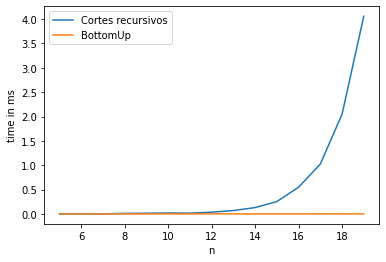

In [11]:
x=[]; y=[]; y1=[]

for n in range(5,20):

  c = cutrod_instance_generator(n)
  d = cutrod_instance_generator(n)

  #la función repeat está ejecutando 10 veces ambas funciones .
  if n < 20:
    t =repeat(setup="from __main__ import RecursiveCut", stmt=f"RecursiveCut({c},{n})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import BottomUp", stmt=f"BottomUp({d},{n})", repeat=1, number=10)
  

  x.append(n)
  y.append(t)
  y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Cortes recursivos","BottomUp"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

---

###Análisis de resultados

Como podemos ver, en valores ya cercanos a un $n$ 18 el algoritmo que trabaja con recursión muestra su tiempo exponencial, dando a entender que si trabajamos con muchos valores la cantidad de tiempo necesario para resolver los cortes se vuelve muy alta. Como se había planteado en la hipótesis, para el algoritmo por acercamiento BottomUp da un tiempo cercano al lineal, debido a que son valores muy pequeños.


---

###Experimento 2

En el siguiente experimento se busca mostrar el tiempo de ejecución del algoritmo por acercamiento BottomUp, debido a que en el anterior experimento no se pudo ver como trabaja para valores $n$ mayores a 20.

$Hipótesis$: *Al trabajar con valores mayores, el algoritmo BottomUp mostrará un crecimiento cuadratico al momento que trabaje problemas de tamaño $n$ muy grandes.*

Para el primer gráfico, se hace trabaja con problemas de tamaño $n$ que van desde $[5...500]$.

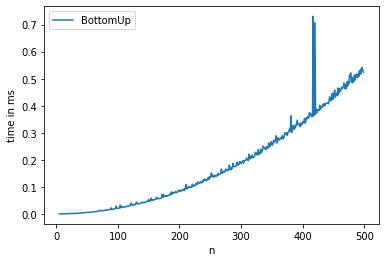

In [12]:
x=[]; y1=[]

for n in range(5,500):
  d = cutrod_instance_generator(n)

  #la función repeat está ejecutando 10 veces 
  t1 = repeat(setup="from __main__ import BottomUp", stmt=f"BottomUp({d},{n})", repeat=1, number=10)
  

  x.append(n)
  y1.append(t1)


plt.plot(x,y1)
plt.legend(["BottomUp"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

---

###Análisis de resultados 1

La interpretación gráfica de la hipótesis propuesta resulto ser cierta, podemos apreciar que para problemas $n$ muy grandes el algoritmo demuestra un tiempo cuadrático bastante limpio (Con un solo pico) al momento de traspasar los valores a la tabla. Esto nos sirve para demostrar el cálculo propuesto en el tiempo de ejecución del algoritmo, dando a entender que efectivamente el tiempo de ejecución es $O(n^2)$.


---

---

El siguiente gráfico no es un experimento aparte, solo se busca ver una demostración visual y observar si hay diferencias en el tiempo de ejecución para problemas $n$ mayores a 500 ([5...1000])

---

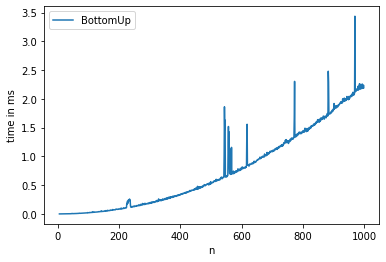

In [13]:
x=[]; y1=[]

for n in range(5,1000):
  d = cutrod_instance_generator(n)

  #la función repeat está ejecutando 10 veces 
  t1 = repeat(setup="from __main__ import BottomUp", stmt=f"BottomUp({d},{n})", repeat=1, number=10)
  

  x.append(n)
  y1.append(t1)


plt.plot(x,y1)
plt.legend(["BottomUp"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

---

###Análisis de resultados 2

Para este segundo gráfico, a diferencia del primero, podemos ver una representación que posee algunos picos, entre valores mayores a 500 aproximadamente, esto puede ocurrir por temas de procesador. Se realizaron varias pruebas para descartar la posibilidad de ser problemas en rendimiento del ordenador, pero todos demostraron tener algunos picos.

Con respecto a la interpretación gráfica, podemos decir que si está presente el tiempo de ejecución cuadratico, demostrando que el algoritmo si posee un tiempo de $O(n^2)$.

---

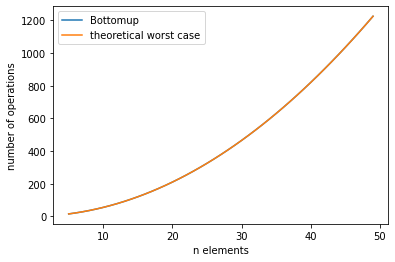

In [23]:
x=[n for n in range(5,50)] 
y1=[n*(n)/2 + n/2 for n in range(5,50)] # worst case
y=[]; 

## experimental case
for n in range(5,50):
  a = cutrod_instance_generator(n)
  a,counter = BottomUp(a,len(a),False)
  y.append(counter)

##Gráfica
plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Bottomup", "theoretical worst case"])

plt.xlabel('n elements')
plt.ylabel('number of operations')
plt.show()

---

###Análisis de resultados

En este experimento se busco comparar el número de comparaciones que realizá con la formula de sub-problemas que resuelve, como se puede ver ambas se sobreponen, por tanto, significa que nuestro calculo en la definición de sub-problemas fueron correctos.

---